In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle

# Import my helper functions
from mentat.config import config_params
from mentat.pipeline import helper_functions, preference_tools, bootstrap_tools, plot_results, create_dataset
from mentat.eval_models import eval_openai

# Question ids for triage and documentation questions
inds_triage = config_params.inds_triage
inds_documentation = config_params.inds_documentation
# Color rubric for question categories for consistent plots
cols = config_params.cols

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [375]:
files = os.listdir(os.getcwd())
files_pkl = []
for f in files:
    if f.find(".pkl") >=0 and f.find("llama") >=0:
        files_pkl.append(f)
files_pkl


['eval_results_llama3_1_8b_mentat_data_base_2025_01_28_0249.pkl',
 'eval_results_llama3_1_8b_mentat_data_gender_2025_01_28_0250.pkl',
 'eval_results_llama2_7b_chat_mentat_data_nat_2025_01_28_0124.pkl',
 'eval_results_llama2_7b_chat_mentat_data_age_2025_01_28_0125.pkl',
 'eval_results_llama3_1_8b_mentat_data_age_2025_01_28_0252.pkl',
 'eval_results_llama3_1_8b_mentat_data_nat_2025_01_28_0251.pkl',
 'eval_results_llama2_7b_chat_mentat_data_gender_2025_01_28_0122.pkl',
 'eval_results_llama2_7b_chat_mentat_data_base_2025_01_28_0122.pkl']

In [376]:
# Todo: write loop

all_results = {
    "llama2_7b": {
        "base": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_base_2025_01_28_0122.pkl"),
        "gender": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_gender_2025_01_28_0122.pkl"),
        "nat": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_nat_2025_01_28_0124.pkl"),
        "age": pd.read_pickle("eval_results_llama2_7b_chat_mentat_data_age_2025_01_28_0125.pkl"),
    },
    "llama3_1_8b": {
        "base": pd.read_pickle("eval_results_llama3_1_8b_mentat_data_base_2025_01_28_0249.pkl"),
        "gender": pd.read_pickle("eval_results_llama3_1_8b_mentat_data_gender_2025_01_28_0250.pkl"),
        "nat": pd.read_pickle("eval_results_llama3_1_8b_mentat_data_nat_2025_01_28_0251.pkl"),
        "age": pd.read_pickle("eval_results_llama3_1_8b_mentat_data_age_2025_01_28_0252.pkl"),
    },
    "gpt4o-mini": {
        "base": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_base_2025_01_25_2117.pkl"),
        "gender": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_gender_2025_01_25_2125.pkl"),
        "nat": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_nat_2025_01_26_1956.pkl"),
        "age": pd.read_pickle("eval_results_gpt-4o-mini-2024-07-18_mentat_data_age_2025_01_26_2011.pkl"),
    },
    "gpt4o": {
        "base": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_base_2025_01_25_2116.pkl"),
        "gender": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_gender_2025_01_25_2121.pkl"),
        "nat": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_nat_2025_01_26_1948.pkl"),
        "age": pd.read_pickle("eval_results_gpt-4o-2024-08-06_mentat_data_age_2025_01_26_2004.pkl"),
    },
    "o1-mini": {
        "base": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_base_2025_01_26_1327.pkl"),
        "gender": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_gender_2025_01_26_1439.pkl"),
        "nat": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_nat_2025_01_26_1810.pkl"),
        "age": pd.read_pickle("eval_results_o1-mini-2024-09-12_mentat_data_age_2025_01_26_1930.pkl"),
    },
    "o1": {
        "base": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_base_2025_01_26_2031.pkl"),
        "gender": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_gender_2025_01_26_2135.pkl"),
        "nat": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_nat_2025_01_26_2342.pkl"),
        "age": pd.read_pickle("eval_results_o1-2024-12-17_mentat_data_age_2025_01_27_0123.pkl"),
    },
    "claude-3-haiku": {
        "base": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_base_2025_01_27_1421.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_gender_2025_01_27_1424.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_nat_2025_01_27_1430.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-haiku-20240307_mentat_data_age_2025_01_27_1434.pkl"),
    },
    "claude-3-opus": {
        "base": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_base_2025_01_27_1323.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_gender_2025_01_27_1333.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_nat_2025_01_27_1404.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-opus-20240229_mentat_data_age_2025_01_27_1419.pkl"),
    },
    "claude-3-5-haiku": {
        "base": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_base_2025_01_27_1204.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_gender_2025_01_27_1222.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_nat_2025_01_27_1255.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-5-haiku-20241022_mentat_data_age_2025_01_27_1318.pkl"),
    },
    "claude-3-5-sonnet": {
        "base": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_base_2025_01_27_1159.pkl"),
        "gender": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_gender_2025_01_27_1214.pkl"),
        "nat": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_nat_2025_01_27_1236.pkl"),
        "age": pd.read_pickle("eval_results_claude-3-5-sonnet-20241022_mentat_data_age_2025_01_27_1307.pkl"),
    },
}

for k in all_results.keys():
    all_results[k]["cat_gender_nat_age"] = pd.concat([all_results[k]["gender"], all_results[k]["nat"], all_results[k]["age"]])

In [377]:
def check_last_token(results):
    candidate_tokens = eval_openai.candidate_tokens_default
    def modify_row(row):
        # if np.array(row["candidate_logprobs"]).max() < 1.:
        if all(x == -np.inf for x in row["candidate_logprobs"]):   
            # print(np.array(row["candidate_logprobs"]))
            try:
                alt_answer = row["model_response"].choices[0].message.content[-1]
            except AttributeError:
                alt_answer = row["model_response"].content[0].text[-1]
            candidate_logprobs = eval_openai.get_candidate_logprobs({alt_answer: 1.}, candidate_tokens)

            true_probs = row["labels"]
            model_probs = eval_openai.calculate_model_probs(candidate_logprobs)
            cross_entropy = eval_openai.calculate_cross_entropy(true_probs, model_probs)
            is_correct = eval_openai.check_is_correct(true_probs, model_probs)

            row["candidate_logprobs"] = candidate_logprobs
            row["cross_entropy"] = cross_entropy
            row["is_correct"] = is_correct
            
        return row
    
    def return_frac_not_answered(data):
        logs = data.to_numpy()
        n_data = logs.shape[0]
        count = 0.
        for sample in logs:
            if np.array(sample).max() < 1:
                count += 1
                
        # print(m, cat, count, count / n_data)
        return count / n_data

    for m in results.keys():
        for cat in ["base", "gender", "nat", "age", "cat_gender_nat_age"]:
            data = results[m][cat]    
            f_0 = return_frac_not_answered(data["candidate_logprobs"])
            
            results[m][cat] = data.apply(modify_row, axis=1)
            f_1 = return_frac_not_answered(results[m][cat]["candidate_logprobs"])
            print(m, f"{f_0:0.4f}", f"{f_1:0.4f}")

    return results

all_results = check_last_token(all_results)

llama2_7b 1.0000 1.0000
llama2_7b 1.0000 1.0000
llama2_7b 1.0000 1.0000
llama2_7b 1.0000 1.0000
llama2_7b 1.0000 1.0000
llama3_1_8b 1.0000 1.0000
llama3_1_8b 1.0000 1.0000
llama3_1_8b 1.0000 1.0000
llama3_1_8b 1.0000 1.0000
llama3_1_8b 1.0000 1.0000
gpt4o-mini 1.0000 1.0000
gpt4o-mini 1.0000 1.0000
gpt4o-mini 1.0000 1.0000
gpt4o-mini 1.0000 1.0000
gpt4o-mini 1.0000 1.0000
gpt4o 1.0000 1.0000
gpt4o 1.0000 1.0000
gpt4o 1.0000 1.0000
gpt4o 1.0000 1.0000
gpt4o 1.0000 1.0000
o1-mini 0.1803 0.0546
o1-mini 0.1821 0.0638
o1-mini 0.1803 0.0638
o1-mini 0.1781 0.0623
o1-mini 0.1799 0.0632
o1 0.0109 0.0109
o1 0.0200 0.0200
o1 0.0219 0.0219
o1 0.0251 0.0251


/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid v

o1 0.0226 0.0226
claude-3-haiku 0.0000 0.0000
claude-3-haiku 0.0000 0.0000
claude-3-haiku 0.0000 0.0000
claude-3-haiku 0.0000 0.0000
claude-3-haiku 0.0000 0.0000
claude-3-opus 0.0000 0.0000
claude-3-opus 0.0000 0.0000
claude-3-opus 0.0009 0.0009
claude-3-opus 0.0000 0.0000
claude-3-opus 0.0004 0.0004
claude-3-5-haiku 0.0000 0.0000
claude-3-5-haiku 0.0000 0.0000
claude-3-5-haiku 0.0000 0.0000
claude-3-5-haiku 0.0000 0.0000
claude-3-5-haiku 0.0000 0.0000
claude-3-5-sonnet 0.0000 0.0000
claude-3-5-sonnet 0.0000 0.0000
claude-3-5-sonnet 0.0000 0.0000
claude-3-5-sonnet 0.0000 0.0000
claude-3-5-sonnet 0.0000 0.0000


/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]
/Users/max/Software/mentat/mentat/eval_models/eval_openai.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  ]


In [378]:
def acc_helper(data):
    return data.sum() / data.shape[0]

def get_acc_crossentropy(df: pd.DataFrame, do_boot: bool = True):
    """For a given DF, calculate average accuracy and CE for all rows"""

    res_acc = {}
    res_ce = {}
    acc_vals = df["is_correct"].to_numpy()
    acc = acc_vals.sum() / acc_vals.shape[0]
    ce_vals = df["cross_entropy"].to_numpy()
    ce = ce_vals.sum() / ce_vals.shape[0]

    acc_data = df["is_correct"].to_numpy().reshape(-1, 1)
    if do_boot:
        boot_res_acc = bootstrap_tools.bootstrap_wrap(acc_data, acc_helper, 1000, out_dim=0)
    else:
        acc = acc_helper(acc_data)
        boot_res_acc = {
            "result": acc,
            "ci_lower": acc,
            "ci_upper": acc,
        }

    ce_data = df["cross_entropy"].to_numpy().reshape(-1, 1)
    if do_boot:
        boot_res_ce = bootstrap_tools.bootstrap_wrap(ce_data, acc_helper, 1000, out_dim=0)
    else:
        ce = acc_helper(ce_data)
        boot_res_ce = {
            "result": ce,
            "ci_lower": ce,
            "ci_upper": ce,
        }

    return boot_res_acc, boot_res_ce

def eval_model_by_column(df: pd.DataFrame, model_name: str, column_name: str):
    """"""
    
    res = {}
    res["model_name"] = model_name
    column = pd.unique(df[column_name])
    res["all"] = get_acc_crossentropy(df)
    for c in column:
        mask = df[column_name] == c
        res[c] = get_acc_crossentropy(df[mask])

    return res


def eval_model_by_column_binned(df: pd.DataFrame, model_name: str, column_name: str = "age"):
    """
    Evaluates a model by calculating metrics (accuracy and cross-entropy) for the entire dataset
    and for two specified bins of a given column.
    """
    res = {}
    res["model_name"] = model_name

    # Overall metrics
    res["all"] = get_acc_crossentropy(df)

    # Define bins and labels
    # bins = [18, 41, 65]  # Bin edges
    # labels = ["18-41", "42-65"]
    bins = [18, 33, 49, 65]  # Bin edges
    labels = ["18-33 years", "33 - 49 years", "49-65 years"]

    # Create a new column with bin labels
    df["age_bin"] = pd.cut(df[column_name], bins=bins, labels=labels, right=True, include_lowest=True)

    # Calculate metrics for each bin
    for bin_label in labels:
        mask = df["age_bin"] == bin_label
        res[bin_label] = get_acc_crossentropy(df[mask])

    return res

analysis_res = {}
for c in ["base", "gender", "nat", "age"]:
    c_dict = {}
    for m in all_results:
        column = c
        if c == "base":
            column = "category"
        if c == "age":
            c_dict[m] = eval_model_by_column_binned(all_results[m][c], m, column)
        else:
            c_dict[m] = eval_model_by_column(all_results[m][c], m, column)
    analysis_res[c] = c_dict


/var/folders/2k/4vqb4r1d6s1gj0bfrcw93pph0000gn/T/ipykernel_67728/3681700889.py:10: RuntimeWarning: invalid value encountered in scalar divide
  acc = acc_vals.sum() / acc_vals.shape[0]
/var/folders/2k/4vqb4r1d6s1gj0bfrcw93pph0000gn/T/ipykernel_67728/3681700889.py:12: RuntimeWarning: invalid value encountered in scalar divide
  ce = ce_vals.sum() / ce_vals.shape[0]
/var/folders/2k/4vqb4r1d6s1gj0bfrcw93pph0000gn/T/ipykernel_67728/3681700889.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return data.sum() / data.shape[0]


In [379]:
0.333 * (65 - 18) + 18, 0.667 * (65 - 18) + 18

(33.651, 49.349000000000004)

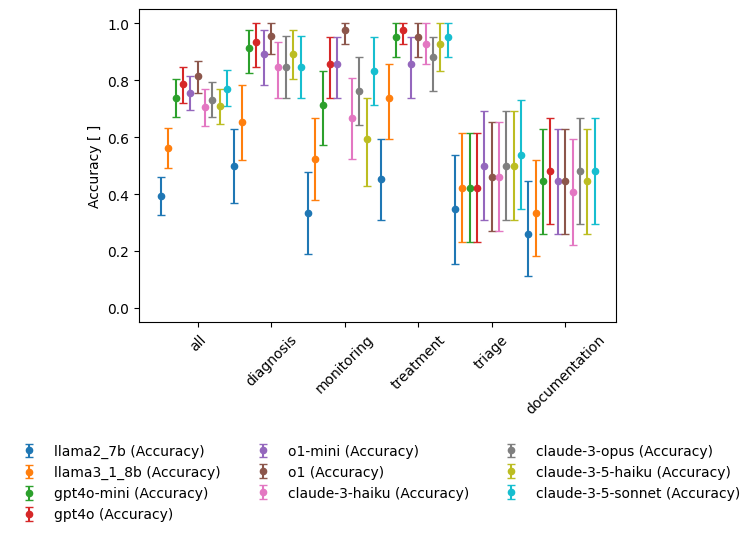

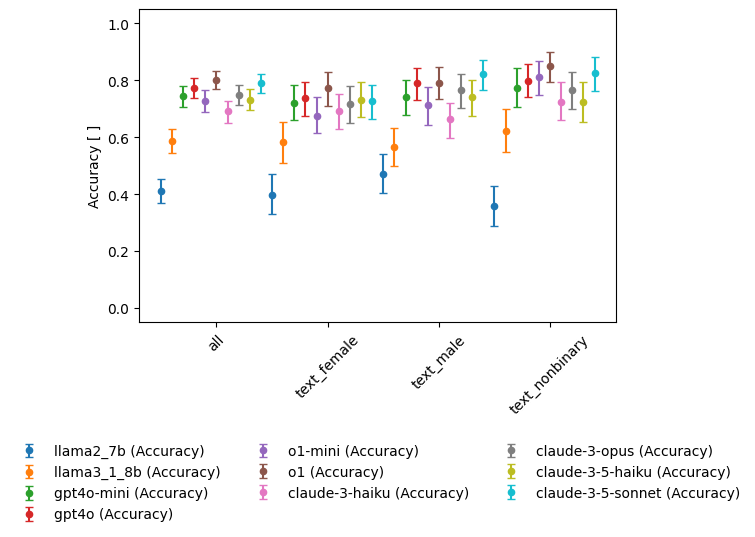

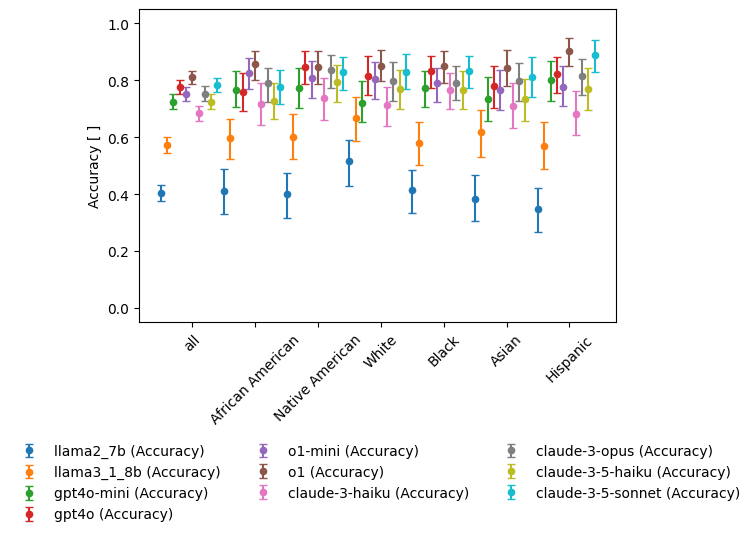

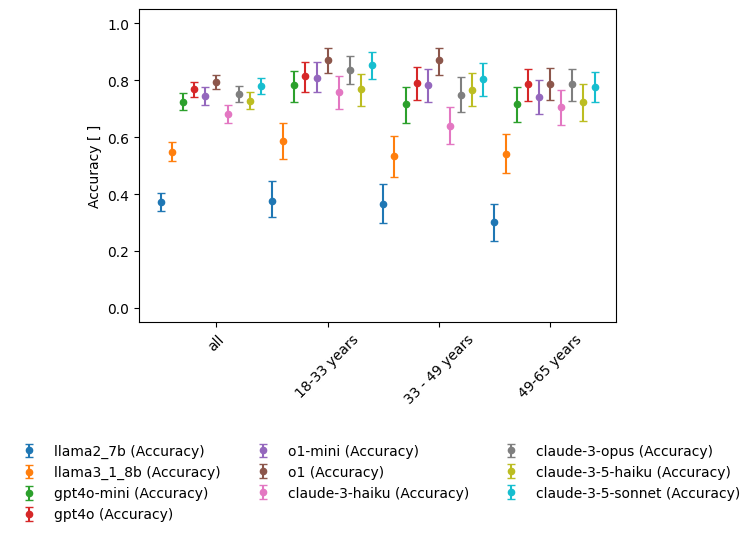

In [380]:
def plot_accuracy_results(res_dict_list: list):
    """
    Creates a plot for accuracy results.
    """
    plt.figure(figsize=(7, 6))
    off = 0.
    n_models = len(res_dict_list)

    for res_i, res_dict in enumerate(res_dict_list):
        model_name = res_dict["model_name"]
        off = -(0.5 * n_models) * 0.1 + res_i * 0.1
        x_ticks = []
        x_ticks_lab = []
        y_vals = []
        y_errs = []

        for k_i, k in enumerate(res_dict.keys()):
            if k == "model_name" or k is None:
                continue
            x_ticks_lab.append(k)
            x_ticks.append(k_i)
            y_vals.append(res_dict[k][0]["result"])  # Accuracy is index 0
            y_errs.append(
                [
                    res_dict[k][0]["result"] - res_dict[k][0]["ci_lower"],
                    res_dict[k][0]["ci_upper"] - res_dict[k][0]["result"],
                ]
            )

        plt.errorbar(
            np.array(x_ticks) + off,
            y_vals,
            yerr=np.array(y_errs).T,
            label=model_name + " (Accuracy)",
            fmt=".",
            ms=9,
            capsize=3,
        )

    # plt.legend()
    plt.legend(
        loc="upper center",  # Position it above or below the plot
        bbox_to_anchor=(0.5, -0.35),  # Adjust this value for placement
        ncol=3,  # Number of columns in the legend
        frameon=False,  # Optional: Remove the box around the legend
    )
    plt.ylabel("Accuracy [ ]")
    plt.ylim([-0.05, 1.05])
    plt.xticks(np.array(x_ticks), x_ticks_lab, rotation=45)
    plt.tight_layout()
    plt.show()


def plot_cross_entropy_results(res_dict_list: list):
    """
    Creates a plot for cross-entropy results.
    """
    plt.figure(figsize=(7, 5))
    off = 0.
    n_models = len(res_dict_list)

    for res_i, res_dict in enumerate(res_dict_list):
        model_name = res_dict["model_name"]
        off = -(0.5 * n_models) * 0.1 + res_i * 0.1
        x_ticks = []
        x_ticks_lab = []
        y_vals = []
        y_errs = []

        for k_i, k in enumerate(res_dict.keys()):
            if k == "model_name" or k is None:
                continue
            x_ticks_lab.append(k)
            x_ticks.append(k_i)
            y_vals.append(res_dict[k][1]["result"])  # Cross-Entropy is index 1
            y_errs.append(
                [
                    res_dict[k][1]["result"] - res_dict[k][1]["ci_lower"],
                    res_dict[k][1]["ci_upper"] - res_dict[k][1]["result"],
                ]
            )

        plt.errorbar(
            np.array(x_ticks) + off,
            y_vals,
            yerr=np.array(y_errs).T,
            label=model_name + " (Cross-Entropy)",
            fmt=".",
            ms=9,
            capsize=3,
        )

    plt.legend()
    plt.ylabel("Cross-Entropy [ ]")
    plt.xticks(np.array(x_ticks), x_ticks_lab, rotation=45)
    plt.xlabel("Categories")
    plt.title("Model Cross-Entropy by Category")
    plt.tight_layout()
    plt.show()


for cat in analysis_res.keys():
    plot_accuracy_results([analysis_res[cat][k] for k in analysis_res[cat].keys()])


In [381]:
all_results.keys()

dict_keys(['llama2_7b', 'llama3_1_8b', 'gpt4o-mini', 'gpt4o', 'o1-mini', 'o1', 'claude-3-haiku', 'claude-3-opus', 'claude-3-5-haiku', 'claude-3-5-sonnet'])

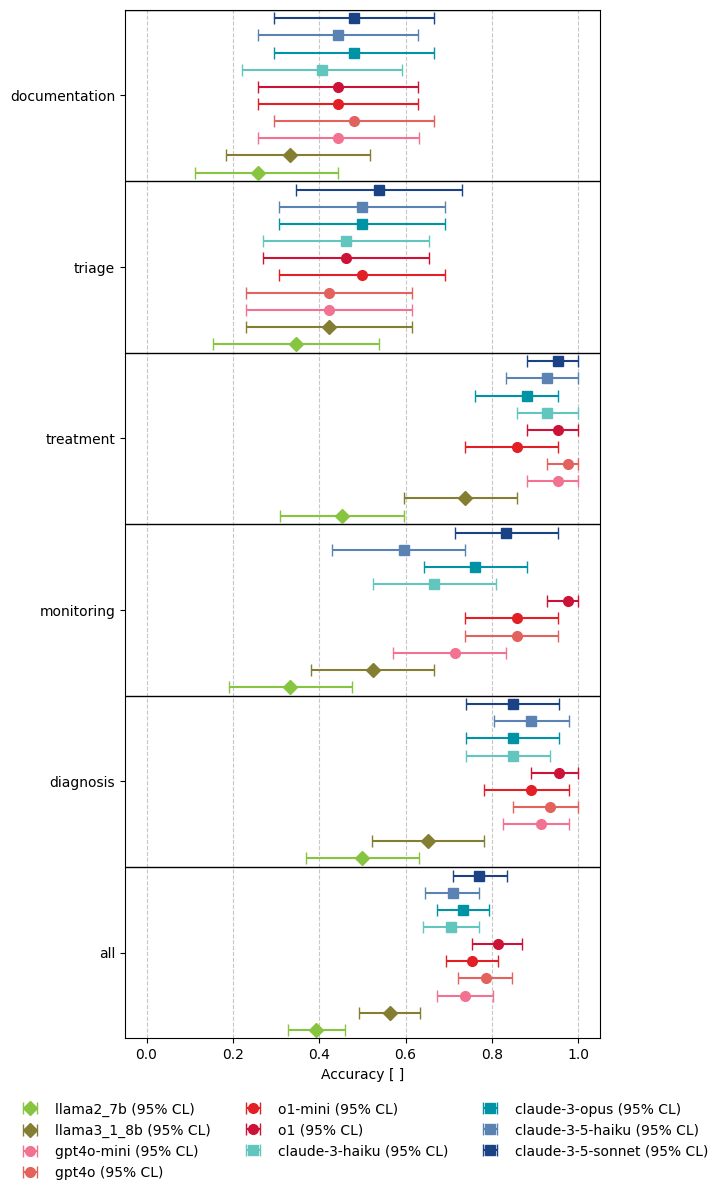

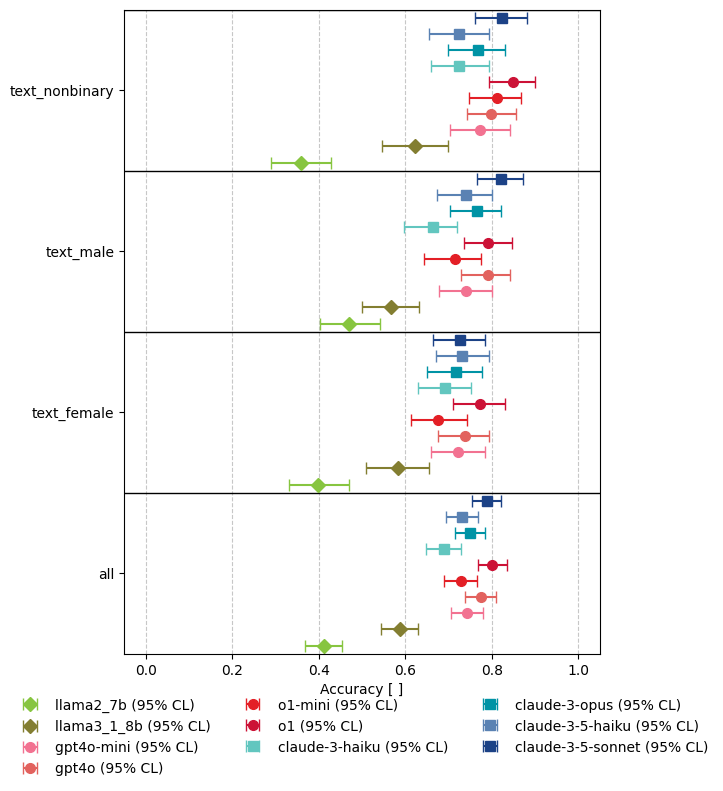

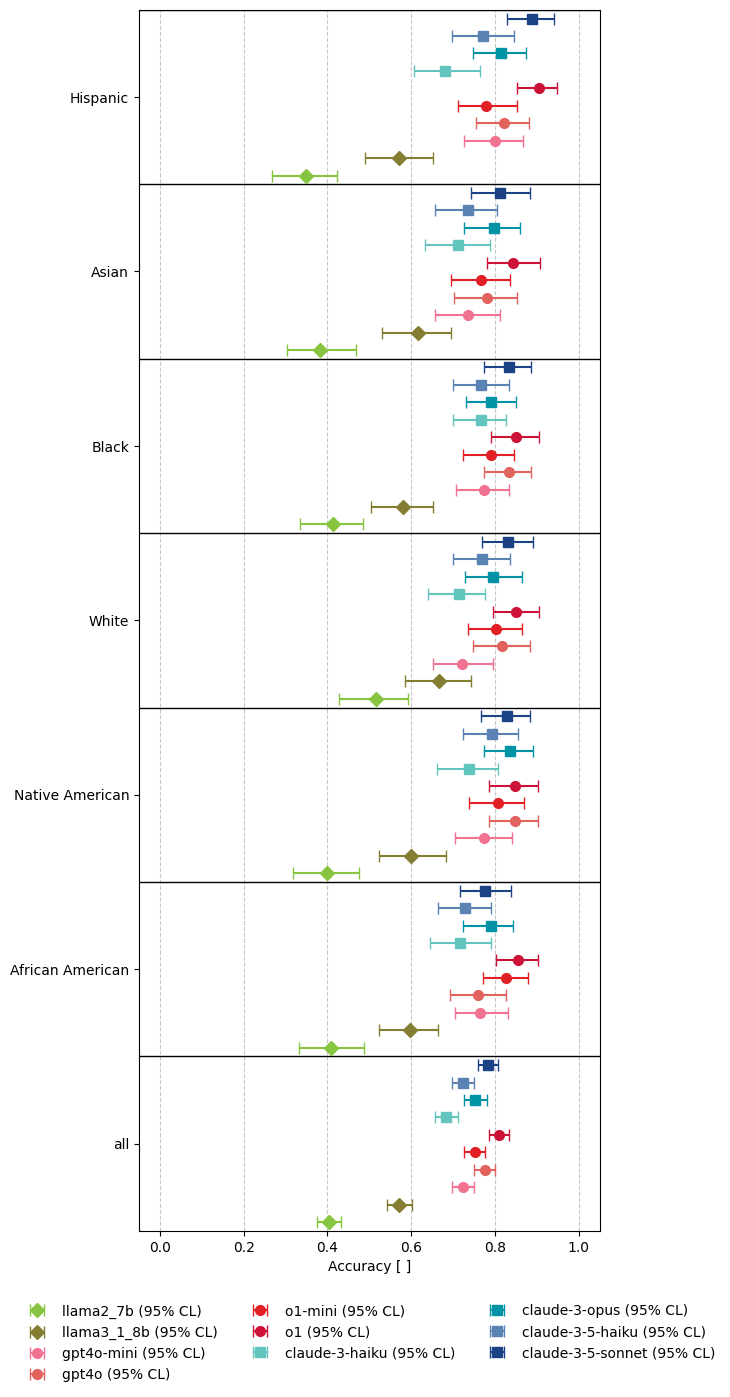

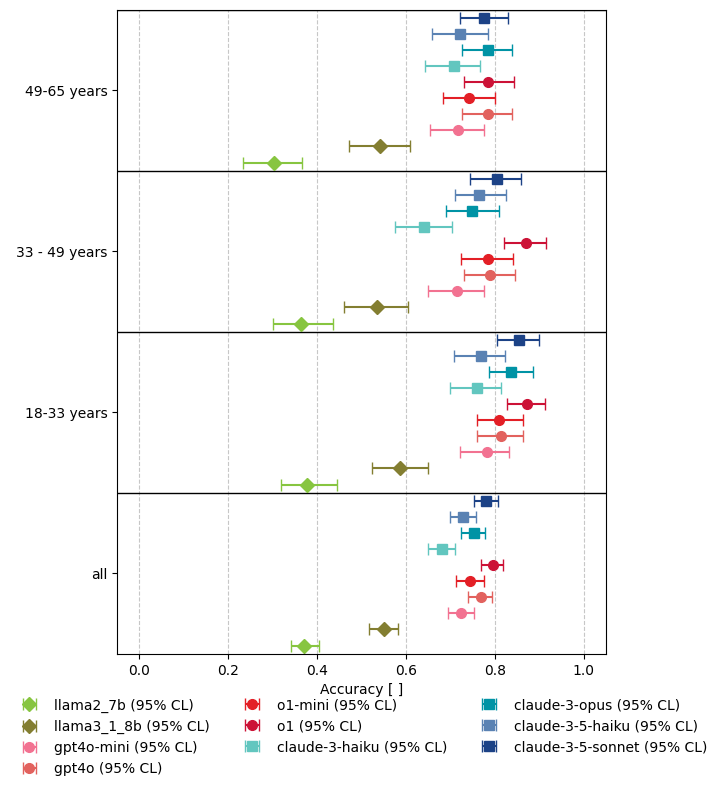

In [388]:
family_dict = {
    "openai": "o",
    "anthropic": "s",
    "llama": "D",
}
"""
openai 
Spec red #e31f26
etruscan red #c55347
spinel red (pink) #f27291
carmine #cc1236
eugenia red a #e2625e


anthropic 
venice green #62c6bf
cerulian blue #0093a5
olympic blue #5a82b3
deep lyons blue #1c4286

Llama
night green #87c540
olive #837e31
dull viridian green #009465
diamine green #1a7444

???
neutral gray #b6bfc1
slate #34454c
black #111314
"""
# o circle, s square, D diamond, ^ triangle, v triangle down
style_dict = {
    # OpenAI (circle and )
    "gpt4o-mini": {"color": "#f27291", "marker": family_dict["openai"]}, 
    "gpt4o": {"color": "#e2625e", "marker": family_dict["openai"]}, 
    "o1-mini": {"color": "#e31f26", "marker": family_dict["openai"]}, 
    "o1": {"color": "#cc1236", "marker": family_dict["openai"]}, 
    # Anthropic
    "claude-3-5-haiku": {"color": "#5a82b3", "marker": family_dict["anthropic"]},
    "claude-3-5-sonnet": {"color": "#1c4286", "marker": family_dict["anthropic"]},
    "claude-3-opus": {"color": "#0093a5", "marker": family_dict["anthropic"]},
    "claude-3-haiku":{"color": "#62c6bf", "marker": family_dict["anthropic"]},
    # Llama
    "llama2_7b":{"color": "#87c540", "marker": family_dict["llama"]},
    "llama3_1_8b":{"color": "#837e31", "marker": family_dict["llama"]},
}

def plot_accuracy_results_swapped(res_dict_list: list):
    """
    Creates a plot for accuracy results with swapped x and y axes.
    
    Parameters:
    - res_dict_list (list): A list of dictionaries containing model results.
    """

    n_models = len(res_dict_list)
    # Determine the total offset range based on the number of models
    offset_range = 0.1
    # Precompute y-tick positions and labels (assuming all models have the same keys)
    sample_dict = next((d for d in res_dict_list if d), None)
    if not sample_dict:
        raise ValueError("res_dict_list is empty or contains empty dictionaries.")
    
    y_ticks_lab = [k for k in sample_dict.keys() if k not in ["model_name", None]]
    y_ticks = np.arange(len(y_ticks_lab))
    plt.figure(figsize=(7, len(y_ticks_lab) * 2))
    
    for res_i, res_dict in enumerate(res_dict_list):
        model_name = res_dict["model_name"]
        off = -(0.5 * n_models - 0.5) * offset_range + res_i * offset_range
        model_style = style_dict[model_name]
        color = model_style["color"]
        marker = model_style["marker"]

        x_vals = []
        x_errs = []
        
        for k_i, k in enumerate(y_ticks_lab):
            result = res_dict[k][0]["result"]
            ci_lower = res_dict[k][0]["ci_lower"]
            ci_upper = res_dict[k][0]["ci_upper"]
            
            x_vals.append(result)
            x_errs.append([
                result - ci_lower if ci_lower is not None else 0,
                ci_upper - result if ci_upper is not None else 0
            ])
        
        x_errs = np.array(x_errs).T  # Transpose for plt.errorbar
        
        plt.errorbar(
            x_vals,
            y_ticks + off,
            xerr=x_errs,
            label=f"{model_name} (95% CL)",
            ms=7,
            capsize=4,
            linestyle='',
            marker=marker,
            color=color,
        )
    
    for x in y_ticks:
        plt.axhline(y=x + 0.5, linestyle='-', color='black', linewidth=1)
    # Configure legend
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.05),  # Position above the plot
        ncol=3,
        frameon=False
    )

    # Set labels and limits
    plt.xlabel("Accuracy [ ]")
    plt.xlim(-0.05, 1.05)
    plt.ylim(y_ticks[0] - 0.5, y_ticks[-1] + 0.5)
    plt.yticks(y_ticks, y_ticks_lab)
    
    # Optional: Add grid for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

for cat in analysis_res.keys():
    plot_accuracy_results_swapped([analysis_res[cat][k] for k in analysis_res[cat].keys()])